## Pesquisa Sócio Econômica 2020 - Passos Mágicos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objs as go
from pywaffle import Waffle

### **Explorando os dados**

Analisando os dados da Pesquisa Sócio Econômica da Passos Mágicos na ano de 2020. A pesquisa compilada foram das pessoas responsáveis pelo domicílio.

In [2]:
df = pd.read_excel("../dados/PSE2020_domicílios.xlsx", sheet_name = "PSE2020_domicílios")

In [3]:
df.head(3)

,V010,V100_first,V104_max,V101_first,V102_first,V106_first,D1601_sum,D1602_sum,D1603_sum,D1604D,...,V511_first,V512_first,V513_first,V514_first,V515_first,V516_first,V517_first,V518_first,V519_first,filter_$
0,2020A1000,2020,4,Jéssica,Centro,Pessoa responsável pelo domicílio,1,0,2,Com Cônjuge,...,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim,Not Selected
1,2020A1001,2020,4,Jéssica,Centro,Pessoa responsável pelo domicílio,1,0,1,Com Cônjuge,...,Próprio de algum morador - já pago,4,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não,Not Selected
2,2020A1002,2020,3,Jéssica,Centro,Pessoa responsável pelo domicílio,0,0,2,Sem Cônjuge,...,Próprio de algum morador - já pago,2,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim,Not Selected


In [4]:
# Retirando as colunas do ano (todos são 2020) e entrevistador(a)
cols_a_retirar = ["V100_first", "V101_first", "V106_first", "filter_$"]
dados = df.drop(columns=cols_a_retirar)
dados.head(3)

,V010,V104_max,V102_first,D1601_sum,D1602_sum,D1603_sum,D1604D,D1605D,D1606D,V107_first,...,V510_first,V511_first,V512_first,V513_first,V514_first,V515_first,V516_first,V517_first,V518_first,V519_first
0,2020A1000,4,Centro,1,0,2,Com Cônjuge,Com filhos,União ou casamento sexo diferente,Homem,...,Gás de botijão,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
1,2020A1001,4,Centro,1,0,1,Com Cônjuge,Com filhos,União ou casamento sexo diferente,Homem,...,Gás de botijão,Próprio de algum morador - já pago,4,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não
2,2020A1002,3,Centro,0,0,2,Sem Cônjuge,Com filhos,Monoparental,Mulher,...,Gás de botijão,Próprio de algum morador - já pago,2,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim


#### Dados gerais

**Dicionário dos dados**

- **V010:** código do domicílio (ID)
- **V102_first:** Código do núcleo do Passos Mágicos
- **V104_max:** Total de moradores da habitação
- **D1601_sum:** Cônjuge de sexo diferente
- **D1602_sum:** Cônjuge do mesmo sexo
- **D1603_sum:** Total de filhos e/ou enteados
- **D1604D:** Cônjuge no domicílio
- **D1605D:** Filhos e/ou enteados no domicílio
- **D1606D:** Arranjo familiar
- **V107_first:** Sexo biológico do responsável
- **D1701_sum:** Total de homens no domicílio
- **D1702_sum:** Total de mulheres no domicílio
- **D108_first:** Idade do responsável
- **V109_first:** cor/raça do responsável
- **V201_first:** relação do responsável com a Passos Mágicos

In [5]:
cols_gerais = ["V010", "V102_first", "V104_max", "D1601_sum", "D1602_sum", "D1603_sum", "D1604D", "D1605D", 
               "D1606D", "V107_first", "D1701_sum", "D1702_sum", "D108_first", "V109_first", "V201_first"]

df_pm_gerais = dados[cols_gerais]
df_pm_gerais.head(3)

,V010,V102_first,V104_max,D1601_sum,D1602_sum,D1603_sum,D1604D,D1605D,D1606D,V107_first,D1701_sum,D1702_sum,D108_first,V109_first,V201_first
0,2020A1000,Centro,4,1,0,2,Com Cônjuge,Com filhos,União ou casamento sexo diferente,Homem,2,2,41,Branca,Pai ou mãe de aluno(a) ativo (atualmente cursa...
1,2020A1001,Centro,4,1,0,1,Com Cônjuge,Com filhos,União ou casamento sexo diferente,Homem,2,2,57,Branca,Pai ou mãe de aluno(a) ativo (atualmente cursa...
2,2020A1002,Centro,3,0,0,2,Sem Cônjuge,Com filhos,Monoparental,Mulher,1,2,47,Branca,Pai ou mãe de aluno(a) ativo (atualmente cursa...


Possível notar que foram mantidos apenas os valores que possuem 2 ou mais valores, tanto nas variáveis categóricas quanto numéricas

In [6]:
df_pm_gerais.describe(exclude=np.number)

,V010,V102_first,D1604D,D1605D,D1606D,V107_first,V109_first,V201_first
count,654,654,654,654,654,654,654,654
unique,654,4,2,2,4,2,5,5
top,2020A1000,Centro,Com Cônjuge,Com filhos,União ou casamento sexo diferente,Mulher,Parda,Pai ou mãe de aluno(a) ativo (atualmente cursa...
freq,1,288,498,644,492,354,307,616


##### Demográfico - População total por sexo

In [7]:
mulheres = dados.D1702_sum.sum()

In [8]:
homens = dados.D1701_sum.sum()

In [9]:
total = mulheres + homens
pct_mulheres = (100 *mulheres/total).round(0)
pct_homens = (100 * homens/total).round(0)

##### Demográfico - População por cor/raça

In [10]:
pop_cor_raca = dados.copy()
pop_cor_raca["pop"] =  dados["D1701_sum"] + dados["D1702_sum"]
pop_cor_raca = pop_cor_raca.groupby("V109_first")[["pop"]].sum().reset_index()
pop_cor_raca.columns = ["cor_raca", "qtd"]
pop_cor_raca

fig = px.bar(pop_cor_raca, x="qtd", y="cor_raca", color = "cor_raca", text_auto=True,
             color_discrete_sequence=["#fec52b","#00b050","#f58334", "#ed3237", "#0367b0"],
             category_orders={'cor_raca':["Parda", "Preta", "Branca", "Amarela","Indígena"]})

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=300, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='População por Cor ou Raça' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,1350], 
                  plot_bgcolor= "#f8f9fa", showlegend=False)


fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{x}</b>', cliponaxis=False)

fig.show()

##### Demográfico - População total por sexo do chefe do domicílio

In [11]:
domicilio_sexo_resp = dados.V107_first.value_counts()
domicilio_sexo_resp.index = ["Mulheres", "Homens"]

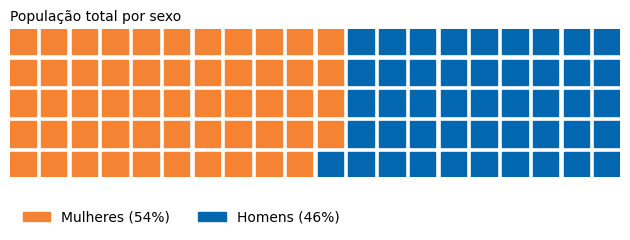

In [12]:
domicilio_sexo_resp = dados.V107_first.value_counts()
domicilio_sexo_resp.index = ["Mulheres", "Homens"]
total = domicilio_sexo_resp.sum()
pct_mulheres = (100 * domicilio_sexo_resp.loc["Mulheres"]/total).round(0)
pct_homens = (100 * domicilio_sexo_resp.loc["Homens"]/total).round(0)

data = {'Mulheres': pct_mulheres, 'Homens': pct_homens}
fig = plt.figure(FigureClass=Waffle, rows=5, values=data, colors=["#f58334", "#0367b0"],
                title={'label': 'População total por sexo', 'loc': 'left', 'size':10},
                labels=[f"{k} ({v:.0f}%)" for k, v in data.items()],
                legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
                starting_location='NW', block_arranging_style='snake')

##### Demográfico - Responsável pelo domicílio por cor/raça

In [13]:
pop_cor_raca = dados.V109_first.value_counts().to_frame().reset_index()
pop_cor_raca.columns = ["cor_raca", "qtd"]

fig = px.bar(pop_cor_raca, x="qtd", y="cor_raca", color = "cor_raca", text_auto=True,
             color_discrete_sequence=["#fec52b","#00b050","#f58334", "#ed3237", "#0367b0"],
             category_orders={'cor_raca':["Parda", "Preta", "Branca", "Amarela","Indígena"]})

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=300, font_family = 'Open Sans', font_size=15, font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='População por Cor ou Raça' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,350], 
                  plot_bgcolor= "#f8f9fa", showlegend=False)

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{x}</b>', cliponaxis=False)

fig.show()

##### Demográfico - Domicílios por nº de moradores

In [14]:
print(dados.V104_max.mean(), dados.V104_max.median(), dados.V104_max.mode()[0])

4.087155963302752 4.0 4


In [15]:
domicilio_n_moradores = dados.V104_max.value_counts().to_frame()
domicilio_n_moradores.loc["1"], domicilio_n_moradores.loc["9"] = 0, 0
domicilio_n_moradores = domicilio_n_moradores.reset_index()
domicilio_n_moradores.columns = ["Nº de Moradores", "Nº de Domicílios"]
domicilio_n_moradores

,Nº de Moradores,Nº de Domicílios
0,4,248
1,3,158
2,5,132
3,6,50
4,2,45
5,7,13
6,8,7
7,10,1
8,1,0
9,9,0


In [16]:
domicilio_n_moradores = dados.V104_max.value_counts().to_frame()
domicilio_n_moradores.loc["1"], domicilio_n_moradores.loc["9"] = 0, 0
domicilio_n_moradores = domicilio_n_moradores.reset_index()
domicilio_n_moradores.columns = ["Nº de Moradores", "Nº de Domicílios"]

fig = px.histogram(domicilio_n_moradores, x="Nº de Moradores", y="Nº de Domicílios", 
                   text_auto=True, color_discrete_sequence=["#68a4d0"], nbins= 10)

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Distribuição dos domicílios por nº de moradores' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', 
                  xaxis_title='Nº de Moradores', yaxis_title='Nº de Domicílios',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, yaxis_range = [0,270], 
                  plot_bgcolor= "#f8f9fa", showlegend=False, bargap=0.1)

fig.update_xaxes(tickmode='array', tickvals=np.arange(1,11))
fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{y}</b>', cliponaxis=False)

fig.show()

##### Demográfico - Domicílios pelo arranjo familiar

In [17]:
domicilio_arranjo_familiar = dados.D1606D.value_counts().to_frame().reset_index()
domicilio_arranjo_familiar.columns = ["arranjo", "qtd"]

fig = px.bar(domicilio_arranjo_familiar, x="qtd", y="arranjo", color = "arranjo", text_auto=True,
             color_discrete_sequence=["#fec52b","#00b050", "#ed3237", "#0367b0"])

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_size=15, font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Distribuição dos domicílios pelos arranjos familiares' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,550], 
                  plot_bgcolor= "#f8f9fa", showlegend=False)

fig.update_yaxes(tickmode='array', tickvals=np.arange(0,4), ticktext = ["União ou casamento<br>(indivíduos de sexo<br>diferente)",
                                                                   "Monoparental",
                                                                   "Consanguíneo",
                                                                   "União ou casamento<br>(indivíduos do<br>mesmo sexo)"])

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{x}</b>', cliponaxis=False)

fig.show()

#### Dados estudantes

**Dicionário dos dados**

- V010:	Código do domicilio
- V104_max:	Total de moradores
- V102_first: Código do Núcleo PM
- D201_sum:	Total de alunos Passos Mágicos
- D202_sum:	Total de bolsistas
- D202A_sum:	Total bolsistas Decisão
- D202B_sum:	Total bolsistas João Paulo II
- D202C_sum:	Total bolsistas Einstein
- D202D_sum:	Total bosistas FIAP
- D202E_sum:	Total bolsistas UNISA
- D202F_sum: Total bolsistas Estácio
- D202G_sum:	Total bolsistas Outros
- D204_sum:	Total de inativos Passos Mágicos


In [18]:
cols_estudantes = ["V010", "V102_first", "D201_sum", "D202_sum", "D202A_sum", "D202B_sum", 
                   "D202C_sum", "D202D_sum", "D202E_sum", "D202F_sum", "D202G_sum", "D204_sum"]
df_pm_estudantes = dados[cols_estudantes]
df_pm_estudantes.head(3)

,V010,V102_first,D201_sum,D202_sum,D202A_sum,D202B_sum,D202C_sum,D202D_sum,D202E_sum,D202F_sum,D202G_sum,D204_sum
0,2020A1000,Centro,1,0,0,0,0,0,0,0,0,0
1,2020A1001,Centro,1,0,0,0,0,0,0,0,0,0
2,2020A1002,Centro,2,1,1,0,0,0,0,0,0,0


##### Passos Mágicos - Proporção dos Alunos Passos Mágicos na população

In [19]:
total_individuos = dados.V104_max.sum()
total_alunos_ativos = dados.D201_sum.sum() - 1  # Um aluno inativo na lista
total_demais_indivíduos = total_individuos - total_alunos_ativos

In [20]:
total_individuos = dados.V104_max.sum()
total_alunos_ativos = dados.D201_sum.sum() - 1  # Um aluno inativo na lista
total_demais_indivíduos = total_individuos - total_alunos_ativos

labels = ["Alunos Passos Mágicos", "Demais Indivíduos"]
values = [total_alunos_ativos, total_demais_indivíduos]

fig = go.Figure(
    data=[
        go.Pie(labels = labels, values = values, textinfo='label+percent',
               marker_colors=["#0367b0","#68a4d0"], rotation = 90 )
        ]
    )

# Ajustando o layout do gráfico
fig.update_layout(width=500, height=500, font_family = 'Open Sans', font_color= "white", title_font_color= "black", 
                  title_font_size=24, title_text='Proporção dos Alunos Passos Mágicos<br>Ativos na amostra da pesquisa' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', showlegend=False)

fig.update_traces(textfont_size=12, texttemplate='<b>%{label}<br>%{value} (%{percent})<br></b>')

fig.show()

##### Passos Mágicos - Total de Alunos Passos Mágicos por sexo

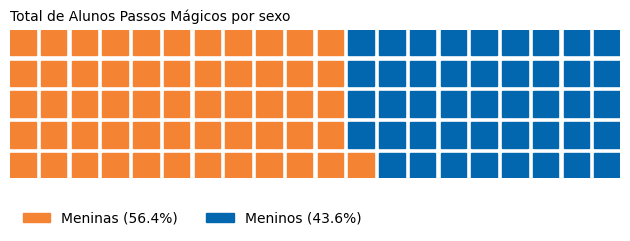

In [21]:
pct_meninas = (100 * 442/783)
pct_meninos = (100 * 341/783)
data = {'Meninas': pct_meninas, 'Meninos': pct_meninos}
data
fig = plt.figure(FigureClass=Waffle, rows=5, values=data, colors=["#f58334", "#0367b0"],
                title={'label': 'Total de Alunos Passos Mágicos por sexo', 'loc': 'left', 'size':10},
                labels=[f"{k} ({v:.1f}%)" for k, v in data.items()],
                legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
                starting_location='NW', block_arranging_style='snake')

##### Passos Mágicos - Alunos Passos Mágicos por cor ou raça

In [22]:
aluno_cor_raca = pd.DataFrame({
    "cor_raca": ["Branca", "Parda", "Preta", "Amarela", "Indígena","Ignorada"],
    "qtd": [368, 358, 51, 4, 1, 1]
})

fig = px.bar(aluno_cor_raca, x="qtd", y="cor_raca", color = "cor_raca", text_auto=True,
             color_discrete_sequence=["#f58334", "#fec52b","#00b050", "#ed3237", "#0367b0", "#cccccc"],
             category_orders={'cor_raca':["Branca", "Parda", "Preta", "Amarela","Indígena", "Ignorada"]})

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=300, font_family = 'Open Sans', font_size=15, font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='População por Cor ou Raça' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,400], 
                  plot_bgcolor= "#f8f9fa", showlegend=False)

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{x}</b>', cliponaxis=False)

fig.show()

##### Passos Mágicos - Alunos pela condição do domicílios

In [23]:
condicao_domicilio = dados.loc[dados.index.repeat(dados.D201_sum)].V201_first.value_counts()
condicao_domicilio = condicao_domicilio.to_frame().reset_index()
condicao_domicilio.columns = ["condicao", "qtd"]
condicao_domicilio = condicao_domicilio.head(4) # retirando o aluno desistente

condicao = {'Pai ou mãe de aluno(a) ativo (atualmente cursando)': "Filho(a) do responsável e/ou do cônjuge",
            'Responsável por aluno(a) ativo (atualmente cursando)': "Outra relação com o responsável",
            'Avô(ó) de aluno(a) ativo (atualmente cursando)': "Neto(a) do responsável",
            'Sem relação': "Sem relação com o responsável"}

condicao_domicilio.condicao = condicao_domicilio.condicao.map(condicao)

fig = px.bar(condicao_domicilio, x="qtd", y="condicao", color = "condicao", text_auto=True,
             color_discrete_sequence=["#fec52b","#00b050", "#ed3237", "#0367b0"])

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_size=15, font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Distribuição dos alunos por sua condição no domicílio' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,850], 
                  plot_bgcolor= "#f8f9fa", showlegend=False, yaxis_categoryorder='total descending')

fig.update_yaxes(tickmode='array', tickvals=np.arange(0,4), ticktext = ["Filho(a) do responsável<br>e/ou do cônjuge",
                                                                   "Outra relação com<br>o responsável",
                                                                   "Neto(a) do<br>responsável",
                                                                   "Sem relação com<br>o responsável"])

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{x}</b>', cliponaxis=False)

fig.show()

##### Passos Mágicos - Distribuição dos alunos pela idade

In [24]:
aluno_idade = pd.DataFrame({
    "Idade": [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    "Nº de Alunos": [11, 45, 62, 107, 107, 84, 84, 84, 52, 62, 57, 20, 6, 1, 1]
})

fig = px.histogram(aluno_idade, x="Idade", y="Nº de Alunos", text_auto=True, color_discrete_sequence=["#68a4d0"], nbins= 8)

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Distribuição dos alunos por idade' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', 
                  xaxis_title='Idade', yaxis_title='Nº de Alunos',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, yaxis_range = [0,240], 
                  plot_bgcolor= "#f8f9fa", showlegend=False, bargap=0.1)

fig.update_xaxes(tickmode='array', tickvals=np.arange(6.5,22.5,2), ticktext = ["6 - 7", "8 - 9", "10 - 11", "12 - 13", 
                                                                               "14 - 15", "16 - 17", "18 - 19", "20 - 21"])
fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{y}</b>', cliponaxis=False)

fig.show()

##### Passos Mágicos - Nº de Alunos por domicílio

In [25]:
domicilio_n_alunos = dados.D201_sum.value_counts().to_frame().reset_index()
domicilio_n_alunos.columns = ["Nº de Alunos Passos Mágicos", "Nº de Domicílios"]

fig = px.histogram(domicilio_n_alunos, x="Nº de Alunos Passos Mágicos", y="Nº de Domicílios", 
                   text_auto=True, color_discrete_sequence=["#68a4d0"], nbins= 5)

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Distribuição dos domicílios por nº de alunos' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', 
                  xaxis_title='Nº de Alunos Passos Mágicos', yaxis_title='Nº de Domicílios',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, yaxis_range = [0,580], 
                  plot_bgcolor= "#f8f9fa", showlegend=False, bargap=0.1)

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{y}</b>', cliponaxis=False)

fig.show()

##### Passos Mágicos - Distribuição dos alunos por núcleo

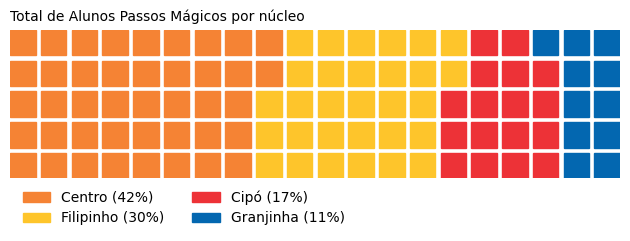

In [26]:
alunos_nucleo = dados.loc[dados.index.repeat(dados.D201_sum)].V102_first.value_counts(normalize=True)
data = (alunos_nucleo * 100)

fig = plt.figure(FigureClass=Waffle, rows=5, values=data, colors=["#f58334", "#fec52b", "#ed3237", "#0367b0"],
                title={'label': 'Total de Alunos Passos Mágicos por núcleo', 'loc': 'left', 'size':10},
                labels=[f"{k} ({v:.0f}%)" for k, v in data.items()],
                legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2, 'framealpha': 0},
                starting_location='NW', block_arranging_style='snake')

#### Dados de ocupação

**Dicionário dos dados**

- **D301_sum**: Total PIT
- **D302_sum**: Total PO
- **D303_sum**: Total PD
- **D304_sum**: Total trabalhadores infantis
- **D305_sum**: Total FFT
- **D306_sum**: Total FT
- **D307_sum**: Total desempregados de longo prazo
- **D316A_sum**: Total trabalhadores formais
- **D316B_sum**: Total trabalhadores informais
- **D330**: Privação trabalho formal

In [27]:
cols_ocupacao = ["V010", "V102_first", "D301_sum", "D302_sum", "D303_sum", "D304_sum",
                  "D305_sum", "D306_sum", "D307_sum", "D316A_sum", "D316B_sum", "D330" ]
df_pm_ocupacao = dados[cols_ocupacao]
df_pm_ocupacao.head(3)

,V010,V102_first,D301_sum,D302_sum,D303_sum,D304_sum,D305_sum,D306_sum,D307_sum,D316A_sum,D316B_sum,D330
0,2020A1000,Centro,3,1,0,0,2,1,0,0,2,privação de trabalho formal
1,2020A1001,Centro,4,2,0,0,2,2,0,1,1,não
2,2020A1002,Centro,2,1,0,0,1,1,0,0,1,privação de trabalho formal


##### Trabalho - PTo, PIT e PFIT

In [28]:
PTo = dados.D1702_sum.sum() + dados.D1701_sum.sum()
PIT = dados.D301_sum.sum()
PFIT = PTo - PIT
print(PTo, PIT, PFIT)

2673 1674 999


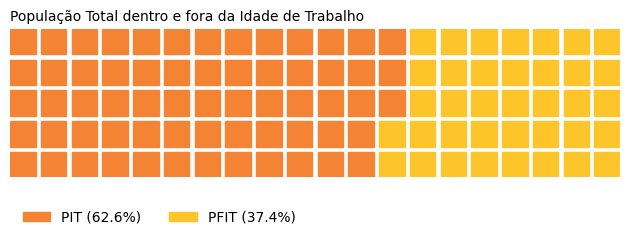

In [29]:
PTo = dados.D1702_sum.sum() + dados.D1701_sum.sum()
PIT = dados.D301_sum.sum()
PFIT = PTo - PIT

pct_PIT = (100 * PIT/PTo)
pct_PFIT = (100 * PFIT/PTo)
data = {'PIT': pct_PIT, 'PFIT': pct_PFIT}
fig = plt.figure(FigureClass=Waffle, rows=5, values=data, colors=["#f58334", "#fec52b"],
                title={'label': 'População Total dentro e fora da Idade de Trabalho', 'loc': 'left', 'size':10},
                labels=[f"{k} ({v:.1f}%)" for k, v in data.items()],
                legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
                starting_location='NW', block_arranging_style='snake')

##### Trabalho - PIT, FT e FFT

In [30]:
PIT = dados.D301_sum.sum()
FT = dados.D306_sum.sum()
FFT = dados.D305_sum.sum()
print(PIT, FT, FFT)

1674 1018 656


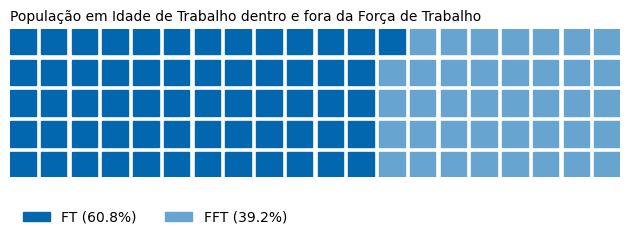

In [31]:
PIT = dados.D301_sum.sum()
FT = dados.D306_sum.sum()
FFT = dados.D305_sum.sum()

pct_FT = (100 * FT/PIT)
pct_FFT = (100 * FFT/PIT)
data = {'FT': pct_FT, 'FFT': pct_FFT}
fig = plt.figure(FigureClass=Waffle, rows=5, values=data, colors=["#0367b0", "#68a4d0"],
                title={'label': 'População em Idade de Trabalho dentro e fora da Força de Trabalho', 'loc': 'left', 'size':10},
                labels=[f"{k} ({v:.1f}%)" for k, v in data.items()],
                legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
                starting_location='NW', block_arranging_style='snake')

##### Trabalho - FT, PO e PD

In [32]:
FT = dados.D306_sum.sum()
PO = dados.D302_sum.sum()
PD = dados.D303_sum.sum()
print(FT, PO, PD)

1018 853 165


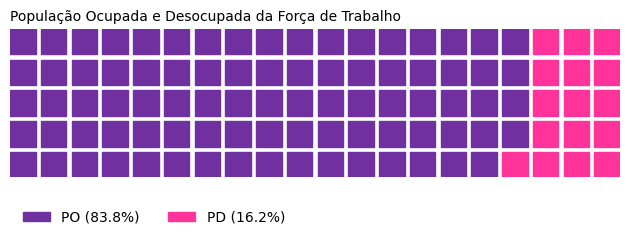

In [33]:
FT = dados.D306_sum.sum()
PO = dados.D302_sum.sum()
PD = dados.D303_sum.sum()

pct_PO = (100 * PO/FT)
pct_PD = (100 * PD/FT)
data = {'PO': pct_PO, 'PD': pct_PD}
fig = plt.figure(FigureClass=Waffle, rows=5, values=data, colors=["#7030a0", "#ff3399"],
                title={'label': 'População Ocupada e Desocupada da Força de Trabalho ', 'loc': 'left', 'size':10},
                labels=[f"{k} ({v:.1f}%)" for k, v in data.items()],
                legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
                starting_location='NW', block_arranging_style='snake')

##### Trabalho - Taxa de Participação

In [34]:
FT = dados.D306_sum.sum()
PIT = dados.D301_sum.sum()
TP = FT/PIT

labels = ["Taxa de Participação", "Complementar da Taxa de Participação"]
values = [TP, 1 - TP]

fig = go.Figure( data=[ go.Pie(labels=labels, values = values, marker_colors=["#0367b0","#cce2f2"], hole = 0.6) ] )

# Ajustando o layout do gráfico
fig.update_layout(width=500, height=500, font_family = 'Open Sans', font_color= "black", title_font_color= "black",
                  title_font_size=24, title_text='Taxa de Participação Geral' + '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>',
                  showlegend=False, annotations=[dict(text=f'<b>Taxa de<br>Participação<br>{TP*100:.1f}%</b>', x=0.5, y=0.5, font_size=28, 
                                                      showarrow=False)])

fig.update_traces(hoverinfo='label+percent', textinfo='none')

fig.show()

##### Trabalho - Taxa de Ocupação Geral

In [35]:
# Taxa de Ocupação Geral
FT = dados.D306_sum.sum()
PO = dados.D302_sum.sum()
TO = PO/FT
labels = ["TO", "Complementar da TO"]
values = [TO, 1 - TO]

# Taxa de Ocupação Homens
TO_H = 0.874
values_2 = [TO_H, 1 - TO_H]

# Taxa de Ocupação Mulheres
TO_M = 0.803
values_3 = [TO_M, 1 - TO_M]

from plotly.subplots import make_subplots

fig = make_subplots(1, 3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values, marker_colors=["#0367b0","#cce2f2"], hole = 0.6), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=values_2, marker_colors=["#0367b0","#cce2f2"], hole = 0.6), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=values_3, marker_colors=["#0367b0","#cce2f2"], hole = 0.6), 1, 3)

#Ajustando o layout do gráfico
fig.update_layout(width=1000, height=500, font_family = 'Open Sans', font_color= "black", title_font_color= "black",
                  title_font_size=24, title_text='Taxa de Ocupação geral e por gênero' + '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>',
                  showlegend=False, 
                  annotations=[dict(text=f'<b>Taxa de<br>Ocupação<br>GERAL<br>{TO*100:.1f}%</b>', x=0.09, y=0.5, font_size=18, showarrow=False),
                               dict(text=f'<b>Taxa de<br>Ocupação<br>HOMENS<br>{TO_H*100:.1f}%</b>', x=0.5, y=0.5, font_size=18, showarrow=False),
                               dict(text=f'<b>Taxa de<br>Ocupação<br>MULHERES<br>{TO_M*100:.1f}%</b>', x=0.92, y=0.5, font_size=18, showarrow=False)]
                               )

fig.update_traces(hoverinfo='label+percent', textinfo='none')

fig.show()

##### Trabalho - Características das Ocupações

In [36]:
dados_ocupacao = pd.DataFrame(
    {
        "Ocupação":["Conta Própria", "Conta Própria", "Doméstico", "Doméstico", "Empregado c/ carteira", "Empregado c/ carteira",
                    "Empregado s/ carteira", "Empregado s/ carteira", "Empregador", "Empregador", "Funcionário público",
                    "Funcionário público", "Militar", "Militar", "Não Caracterizado", "Não Caracterizado"],
        "Gênero": ['Homens', 'Mulheres', 'Homens', 'Mulheres', 'Homens', 'Mulheres', 'Homens', 'Mulheres', 'Homens', 'Mulheres',
                    'Homens', 'Mulheres', 'Homens', 'Mulheres', 'Homens', 'Mulheres'],
        "Qtd": [158, 127, 5, 45, 169, 125, 39, 31, 17, 21, 28, 55, 2, 2, 18, 11]
    }
)

fig = px.bar(dados_ocupacao, x="Qtd", y="Ocupação", color = "Gênero", text_auto=True,
             color_discrete_sequence=["#0367b0","#f58334"])

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=500, font_family = 'Open Sans', font_size=15, font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Caracteríticas das Ocupações com distribuição por gênero' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,305], 
                  plot_bgcolor= "#f8f9fa", yaxis_categoryorder='total ascending', legend=dict(x=0.82, y=0.1, bgcolor="#f8f9fa", title=None))

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{x}</b>', cliponaxis=False)

fig.show()

##### Trabalho - Taxa de Desemprego Geral

In [37]:
# Taxa de Desemprego Geral
PD = dados.D303_sum.sum()
PO = dados.D302_sum.sum()
TD = PD/PO
labels = ["TD", "Complementar da TD"]
values = [TD, 1 - TD]

# Taxa de Desemprego Homens
TD_H = 0.144
values_2 = [TD_H, 1 - TD_H]

# Taxa de Desemprego Mulheres
TD_M = 0.245
values_3 = [TD_M, 1 - TD_M]

from plotly.subplots import make_subplots

fig = make_subplots(1, 3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values, marker_colors=["#be282c","#fac2c3"], hole = 0.6, rotation = 90), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=values_2, marker_colors=["#be282c","#fac2c3"], hole = 0.6, rotation = 90), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=values_3, marker_colors=["#be282c","#fac2c3"], hole = 0.6, rotation = 90), 1, 3)

#Ajustando o layout do gráfico
fig.update_layout(width=1000, height=500, font_family = 'Open Sans', font_color= "black", title_font_color= "black",
                  title_font_size=24, title_text='Taxa de Desemprego geral e por gênero' + '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>',
                  showlegend=False, 
                  annotations=[dict(text=f'<b>Taxa de<br>Desemprego<br>GERAL<br>{TD*100:.1f}%</b>', x=0.07, y=0.5, font_size=18, showarrow=False),
                               dict(text=f'<b>Taxa de<br>Desemprego<br>HOMENS<br>{TD_H*100:.1f}%</b>', x=0.5, y=0.5, font_size=18, showarrow=False),
                               dict(text=f'<b>Taxa de<br>Desemprego<br>MULHERES<br>{TD_M*100:.1f}%</b>', x=0.92, y=0.5, font_size=18, showarrow=False)]
                               )

fig.update_traces(hoverinfo='label+percent', textinfo='none')

fig.show()

##### Trabalho - Taxa de assalariamento x informalidade

In [38]:
formal = ["Militar", "Empregado c/ carteira", "Funcionário público", "Empregador", "Não Caracterizado"]
informal = ["Doméstico", "Empregado s/ carteira", "Conta Própria"]
trabalhadores_formais = dados_ocupacao.query("Ocupação in @formal ").Qtd.sum()
trabalhadores_informais = dados_ocupacao.query("Ocupação in @informal ").Qtd.sum()
PO = dados_ocupacao.Qtd.sum()
TI = trabalhadores_informais/PO
TA = trabalhadores_formais/PO

# Taxa de Informalidade
labels = ["TI", "Complementar da TI"]
values = [TI, 1 - TI]

# Taxa de Assalariamento
labels = ["TA", "Complementar da TA"]
values_2 = [TA, 1 - TA]

from plotly.subplots import make_subplots

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values, marker_colors=["#00b050","#99dfb9"], hole = 0.6, rotation = 180), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=values_2, marker_colors=["#fec52b","#ffe8aa"], hole = 0.6, rotation = 0), 1, 2)

#Ajustando o layout do gráfico
fig.update_layout(width=800, height=500, font_family = 'Open Sans', font_color= "black", title_font_color= "black",
                  title_font_size=24, title_text='Taxa de Informalidade x assalariamento geral' + '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>',
                  showlegend=False, 
                  annotations=[dict(text=f'<b>Taxa de<br>Informalidade<br>{TI*100:.1f}%</b>', x=0.1, y=0.5, font_size=21, showarrow=False),
                               dict(text=f'<b>Taxa de<br>Assalariamento<br>{TA*100:.1f}%</b>', x=0.91, y=0.5, font_size=21, showarrow=False)]
                )

fig.update_traces(hoverinfo='label+percent', textinfo='none')

fig.show()

##### Trabalho - Ocupações por domicílio

In [39]:
sem_formais = dados.query("D316A_sum == 0").shape[0]
sem_formais

283

In [40]:
sem_trabalhadores = formais_e_informais = dados.query("D316B_sum == 0 and D316A_sum == 0").shape[0]
sem_trabalhadores

61

In [41]:
apenas_formais = dados.query("D316B_sum == 0 and D316A_sum > 0").shape[0]
apenas_formais

225

In [42]:
com_formais_e_informais = dados.shape[0] - (sem_formais + sem_trabalhadores + apenas_formais)
com_formais_e_informais

85

In [43]:
sem_formais = dados.query("D316A_sum == 0").shape[0]
sem_trabalhadores = formais_e_informais = dados.query("D316B_sum == 0 and D316A_sum == 0").shape[0]
apenas_formais = dados.query("D316B_sum == 0 and D316A_sum > 0").shape[0]
com_formais_e_informais = dados.shape[0] - (sem_formais + sem_trabalhadores + apenas_formais)


labels = ["SEM Formais", "APENAS Formais", "COM Formais<br>e Informais", "SEM<br>Trabalhadores"]
values = [sem_formais, apenas_formais, com_formais_e_informais, sem_trabalhadores]

fig = go.Figure(
    data=[
        go.Pie(labels = labels, values = values, textinfo='label+percent',
               marker_colors=["#00b050", "#fec52b", "#0367b0","#be282c"])
        ]
    )

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=700, font_family = 'Open Sans', font_color= "white", title_font_color= "black", 
                  title_font_size=24, title_text='Domicílios pelas relações de trabalho' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', showlegend=False)

fig.update_traces(textfont_size=14, texttemplate='<b>%{label}<br>%{value} (%{percent})<br></b>')

fig.show()

#### Dados de renda familiar

**Dicionário dos dados**

- **D319_sum**: Valor total rendas do trabalho
- **D401_sum**: Total indivíduos BPC/LOAS
- **V402_sum**: Valor total BPC/LOAS
- **D403_sum**: Total indivíduos Bolsa Família
- **V404_sum**: Valor total Bolsa Família
- **D405_sum**: Total indivíduos Outros Programas
- **V406_sum**: Valor total Outros Programas
- **D407_sum**: Total indivíduos Aposentadoria
- **V408_sum**: Valor total Aposentadoria
- **D409_sum**: Total indivíduos Seguro desemprego
- **V410_sum**: Valor total Seguro desemprego
- **D411_sum**: Total indivíduos Pensão ou mesada
- **V412_sum**: Valor total Pensão ou mesada
- **D413_sum**: Total indivíduos Aluguel
- **V414_sum**: Valor total Aluguel
- **D415_sum**: Valor total Rendas Programas Sociais
- **D416_sum**: Valor total Outras Rendas
- **D420_sum**: Valor Renda total do domicílio
- **D421**: Origem da renda
- **D422**: Renda per capita
- **D423**: Renda per capita em faixas
- **D425**: Renda total em faixas
- **D499**: Linhas pobreza

In [44]:
cols_renda = ["V010", "V102_first", "D319_sum", "D401_sum", "V402_sum", "D403_sum", "V404_sum", "D405_sum", "V406_sum", "D407_sum", 
              "V408_sum", "D409_sum", "V410_sum", "D411_sum", "V412_sum", "D413_sum", "V414_sum", "D415_sum", "D416_sum", "D420_sum", 
              "D421", "D422", "D423", "D425", "D499"]
df_pm_renda = dados[cols_renda]
df_pm_renda.head(3)

,V010,V102_first,D319_sum,D401_sum,V402_sum,D403_sum,V404_sum,D405_sum,V406_sum,D407_sum,...,D413_sum,V414_sum,D415_sum,D416_sum,D420_sum,D421,D422,D423,D425,D499
0,2020A1000,Centro,2613,0,0,0,0,0,0,0,...,0,0,0,0,2613,renda do trabalho,653.250000,"R$ 557,01 a R$ 836,00","R$ 2.091,00 a R$ 3.135,00 [3 SM]",PSE2020
1,2020A1001,Centro,2613,0,0,0,0,0,0,1,...,0,0,1400,0,4013,trabalho e programas sociais,1003.250000,"R$ 836,01 a R$ 1.115,00","R$ 3.136,00 a R$ 4.180,00 [4 SM]",EG
2,2020A1002,Centro,1568,0,0,0,0,0,0,0,...,0,0,0,0,1568,renda do trabalho,522.666667,"R$ 278,01 a R$ 557,00","R$ 1.046,00 a R$ 1.568,00 [1,5 SM]",PSE2020


##### Renda - Domicílios por faixa da renda total

In [45]:
domicilios_por_faixa_renda = dados.D425.value_counts().to_frame()
domicilios_por_faixa_renda.index = ["2-3 SM", "1-1.5 SM", "3-4 SM", "1.5-2 SM", "5-7 SM", "0.5-1 SM",
                                    "4-5 SM", "0-0.5 SM", "7-10 SM", "0", "acima de 10 SM"]
domicilios_por_faixa_renda = domicilios_por_faixa_renda.sort_index().reset_index()
domicilios_por_faixa_renda.columns = ["faixa_renda", "qtd"]
domicilios_por_faixa_renda

,faixa_renda,qtd
0,0,8
1,0-0.5 SM,18
2,0.5-1 SM,51
3,1-1.5 SM,124
4,1.5-2 SM,85
5,2-3 SM,138
6,3-4 SM,122
7,4-5 SM,46
8,5-7 SM,51
9,7-10 SM,10


In [46]:
domicilios_por_faixa_renda = dados.D425.value_counts().to_frame()
domicilios_por_faixa_renda.index = ["2-3 SM", "1-1.5 SM", "3-4 SM", "1.5-2 SM", "5-7 SM", "0.5-1 SM",
                                    "4-5 SM", "0-0.5 SM", "7-10 SM", "0", "acima de 10 SM"]
domicilios_por_faixa_renda = domicilios_por_faixa_renda.sort_index().reset_index()
domicilios_por_faixa_renda.columns = ["faixa_renda", "qtd"]

fig = px.histogram(domicilios_por_faixa_renda, x="faixa_renda", y="qtd", text_auto=True, color_discrete_sequence=["#68a4d0"])

# Ajustando o layout do gráfico
fig.update_layout(width=900, height=500, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Domicílios por faixas de renda total' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', 
                  xaxis_title='Faixas de Renda Total', yaxis_title='Nº de Domicílios',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, yaxis_range = [0,150], 
                  plot_bgcolor= "#f8f9fa", showlegend=False, bargap=0.1)

fig.update_xaxes(tickmode='array', tickvals=np.arange(0,12,1), ticktext = ['0', '0 - 0.5<br>SM', '0.5 - 1<br>SM', '1 - 1.5<br>SM',
                                                                           '1.5 - 2<br>SM', '2 - 3<br>SM', '3 - 4<br>SM', '4 - 5<br>SM',
                                                                           '5 - 7<br>SM', '7 - 10<br>SM', 'acima de<br>10 SM'])
fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{y}</b>', cliponaxis=False)

fig.show()

##### - Renda  - Renda per capita comparada

In [47]:
total_moradores = dados.V104_max.sum()
renda_total = dados.D420_sum.sum()
renda_per_capita_pse = (renda_total/total_moradores).round(0)

In [48]:
total_moradores, renda_total = dados.V104_max.sum(), dados.D420_sum.sum()
renda_per_capita_pse = (renda_total/total_moradores).round(0)

rendas_per_capita = pd.DataFrame({
    "local": ["Brasil", "SP", "Embu-Guaçu", "PSE 2020"],
    "renda_per_capita": [1439, 1946, 1391, renda_per_capita_pse] })

fig = px.bar(rendas_per_capita, x="local", y="renda_per_capita",  color="local",
             color_discrete_sequence=["#f58334", "#fec52b", "#00b050","#be282c"], text_auto=True,)

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Renda <i>per capita</i> PSE 2020 em comparação' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', 
                  yaxis_title='Valor da Renda <i>per capita</i>',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, yaxis_range = [0,2100], 
                  plot_bgcolor= "#f8f9fa", showlegend=False, bargap=0.1)

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>R$ %{y:,.2f}</b>', cliponaxis=False)
fig.update_yaxes(tickprefix = 'R$ ', tickformat = ',.0f')

fig.show()

##### Renda - Distribuição dos indivíduos pela faixa de Renda Per Capita

In [49]:
domicilios_por_faixa_renda_per_capita = dados.D423.value_counts().to_frame()

faixas = ['R$ 0,00 a R$ 278,00','R$ 278,01 a R$ 557,00', 'R$ 557,01 a R$ 836,00', 'R$ 836,01 a R$ 1.115,00',
          'R$ 1.115,01 a R$ 1.394,00', 'R$ 1.394,01 a R$ 1.673,00', 'R$ 1.673,01 a R$ 1.952,00',
          'R$ 1.952,01 a R$ 2.231,00', 'R$ 2.231,01 a R$ 2.510,00', 'R$ 2.510,01 acima']

domicilios_por_faixa_renda_per_capita = domicilios_por_faixa_renda_per_capita.reindex(faixas).reset_index()
domicilios_por_faixa_renda_per_capita.columns = ["faixa_renda_per_capita", "qtd"]
domicilios_por_faixa_renda_per_capita

,faixa_renda_per_capita,qtd
0,"R$ 0,00 a R$ 278,00",87
1,"R$ 278,01 a R$ 557,00",201
2,"R$ 557,01 a R$ 836,00",172
3,"R$ 836,01 a R$ 1.115,00",103
4,"R$ 1.115,01 a R$ 1.394,00",48
5,"R$ 1.394,01 a R$ 1.673,00",19
6,"R$ 1.673,01 a R$ 1.952,00",12
7,"R$ 1.952,01 a R$ 2.231,00",9
8,"R$ 2.231,01 a R$ 2.510,00",1
9,"R$ 2.510,01 acima",2


In [50]:
domicilios_por_faixa_renda_per_capita = dados.D423.value_counts().to_frame()

faixas = ['R$ 0,00 a R$ 278,00','R$ 278,01 a R$ 557,00', 'R$ 557,01 a R$ 836,00', 'R$ 836,01 a R$ 1.115,00',
          'R$ 1.115,01 a R$ 1.394,00', 'R$ 1.394,01 a R$ 1.673,00', 'R$ 1.673,01 a R$ 1.952,00',
          'R$ 1.952,01 a R$ 2.231,00', 'R$ 2.231,01 a R$ 2.510,00', 'R$ 2.510,01 acima']

domicilios_por_faixa_renda_per_capita = domicilios_por_faixa_renda_per_capita.reindex(faixas).reset_index()
domicilios_por_faixa_renda_per_capita.columns = ["faixa_renda_per_capita", "qtd"]

fig = px.histogram(domicilios_por_faixa_renda_per_capita, x="faixa_renda_per_capita", y="qtd", text_auto=True, color_discrete_sequence=["#68a4d0"])

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=500, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Domicílios por faixas de renda per capita' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', 
                  xaxis_title='Faixas de Renda <i>per capita</i>', yaxis_title='Nº de Domicílios',
                  xaxis_tickfont_size=12, yaxis_tickfont_size=14, yaxis_range = [0,220], 
                  plot_bgcolor= "#f8f9fa", showlegend=False, bargap=0.1)

fig.update_xaxes(tickmode='array', tickvals=np.arange(0,12,1), 
                 ticktext = ['R$ 0,00<br>a<br>R$ 278,00','R$ 278,01<br>a<br>R$ 557,00', 'R$ 557,01<br>a<br>R$ 836,00', 
                             'R$ 836,01<br>a<br>R$ 1.115,00', 'R$ 1.115,01<br>a<br>R$ 1.394,00', 'R$ 1.394,01<br>a<br>R$ 1.673,00', 
                             'R$ 1.673,01<br>a<br>R$ 1.952,00', 'R$ 1.952,01<br>a<br>R$ 2.231,00', 
                             'R$ 2.231,01<br>a<br>R$ 2.510,00', 'acima de<br>R$ 2.510,01'])
fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{y}</b>', cliponaxis=False)

fig.show()

##### Renda - Agrupamento por renda per capita

In [51]:
renda_per_capita_brasil, renda_per_capita_SP, renda_per_capita_embu_guacu = 1439, 1946, 1391
renda_per_capita_pse = dados.D422.sum() / dados.shape[0]
renda_per_capita_centro = dados.query("V102_first =='Centro'").D422.sum() / dados.query("V102_first =='Centro'").shape[0]
renda_per_capita_filipinho = dados.query("V102_first =='Filipinho'").D422.sum() / dados.query("V102_first =='Filipinho'").shape[0]
renda_per_capita_cipo = dados.query("V102_first =='Cipó'").D422.sum() / dados.query("V102_first =='Cipó'").shape[0]
renda_per_capita_granjinha = dados.query("V102_first =='Granjinha'").D422.sum() / dados.query("V102_first =='Granjinha'").shape[0]

In [52]:
rendas_per_capita = pd.DataFrame({
    "local": ["Brasil", "SP", "Embu-Guaçu", "PSE 2020", "Centro", "Filipinho", "Cipó", "Granjinha"],
    "renda_per_capita": [renda_per_capita_brasil, renda_per_capita_SP, renda_per_capita_embu_guacu, renda_per_capita_pse,
                         renda_per_capita_centro, renda_per_capita_filipinho, renda_per_capita_cipo, renda_per_capita_granjinha] })

fig = px.bar(rendas_per_capita, y="local", x="renda_per_capita",  color="local",
             color_discrete_sequence=["#f58334", "#333333", "#cccccc","#be282c", "#fac2c3", "#fac2c3", "#fac2c3","#fac2c3"], text_auto=True)

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=700, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Agrupamento por Renda <i>per capita</i>' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title = '', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,2500], 
                  plot_bgcolor= "#f8f9fa", showlegend=False)

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>R$ %{x:,.2f}</b>', cliponaxis=False)
fig.update_xaxes(tickprefix = 'R$ ', tickformat = ',.0f')

fig.show()

##### Renda - Renda por gênero

In [53]:
renda_per_capita_homens = dados.query("V107_first == 'Homem'").D420_sum.sum() / dados.query("V107_first == 'Homem'").V104_max.sum()
renda_per_capita_mulheres = dados.query("V107_first == 'Mulher'").D420_sum.sum() / dados.query("V107_first == 'Mulher'").V104_max.sum()

In [54]:
renda_per_capita_homens = dados.query("V107_first == 'Homem'").D420_sum.sum() / dados.query("V107_first == 'Homem'").V104_max.sum()
renda_per_capita_mulheres = dados.query("V107_first == 'Mulher'").D420_sum.sum() / dados.query("V107_first == 'Mulher'").V104_max.sum()

rendas_per_capita = pd.DataFrame({
    "genero": ["Homens", "Mulheres"],
    "renda_per_capita": [renda_per_capita_homens, renda_per_capita_mulheres] })

fig = px.bar(rendas_per_capita, x="genero", y="renda_per_capita",  color="genero",
             color_discrete_sequence=["#0367b0", "#f58334"], text_auto=True)

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Renda <i>per capita</i> por gênero' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', 
                  yaxis_title='', xaxis_title='', xaxis_tickfont_size=14, yaxis_tickfont_size=14, 
                  yaxis_range = [0,770], plot_bgcolor= "#f8f9fa", showlegend=False)

fig.update_traces(textfont_size=20, textposition="outside", texttemplate='<b>R$ %{y:,.2f}</b>', cliponaxis=False)
fig.update_yaxes(tickprefix = 'R$ ', tickformat = ',.2f')

fig.show()

##### Renda - Renda per capita por cor ou raça do responsável

In [55]:
dados.V109_first.unique()

array(['Branca', 'Parda', 'Preta', 'Indígena', 'Amarela'], dtype=object)

In [56]:
renda_per_capita_resp_brancos = dados.query("V109_first == 'Branca'").D420_sum.sum() / dados.query("V109_first == 'Branca'").V104_max.sum()
condicao_preto_pardo = "V109_first == 'Parda' or V109_first == 'Preta'"
condicao_amarelo_indigena = "V109_first == 'Indígena' or V109_first == 'Amarela'"
renda_per_capita_resp_pretos_pardos = dados.query(condicao_preto_pardo).D420_sum.sum() / dados.query(condicao_preto_pardo).V104_max.sum()
renda_per_capita_resp_amarelo_indigena = dados.query(condicao_amarelo_indigena).D420_sum.sum() / dados.query(condicao_amarelo_indigena).V104_max.sum()

In [57]:
renda_per_capita_resp_brancos = dados.query("V109_first == 'Branca'").D420_sum.sum() / dados.query("V109_first == 'Branca'").V104_max.sum()
condicao_preto_pardo = "V109_first == 'Parda' or V109_first == 'Preta'"
condicao_amarelo_indigena = "V109_first == 'Indígena' or V109_first == 'Amarela'"
renda_per_capita_resp_pretos_pardos = dados.query(condicao_preto_pardo).D420_sum.sum() / dados.query(condicao_preto_pardo).V104_max.sum()
renda_per_capita_resp_amarelo_indigena = dados.query(condicao_amarelo_indigena).D420_sum.sum() / dados.query(condicao_amarelo_indigena).V104_max.sum()

rendas_per_capita = pd.DataFrame({
    "cor_raca": ["Brancos", "Pretos e Pardos", "Amarelos e Indígenas"],
    "renda_per_capita": [renda_per_capita_resp_brancos, renda_per_capita_resp_pretos_pardos, renda_per_capita_resp_amarelo_indigena] })

fig = px.bar(rendas_per_capita, x="cor_raca", y="renda_per_capita",  color="cor_raca",
             color_discrete_sequence=["#f58334", "#fec52b", "#0367b0"], text_auto=True)

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Renda <i>per capita</i> por gênero' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', 
                  yaxis_title='', xaxis_title='', xaxis_tickfont_size=14, yaxis_tickfont_size=14, 
                  yaxis_range = [0,770], plot_bgcolor= "#f8f9fa", showlegend=False)

fig.update_traces(textfont_size=20, textposition="outside", texttemplate='<b>R$ %{y:,.2f}</b>', cliponaxis=False)
fig.update_yaxes(tickprefix = 'R$ ', tickformat = ',.2f')

fig.show()

##### Renda - Origem da renda

In [58]:
origem_renda_domicilio = dados.D421.value_counts().to_frame().reset_index()
origem_renda_domicilio.columns = ["origem_renda", "qtd"]
origem_renda_domicilio.origem_renda = ["Trabalho", "Trabalho e Programas Sociais", "Trabalho e Outras Rendas",
                                       "Programa Sociais", "Trabalho, Programas Sociais e Outras Rendas",
                                       "Sem Renda", "Programas Sociais e Outras Rendas", "Outras Rendas"]
origem_renda_domicilio

,origem_renda,qtd
0,Trabalho,310
1,Trabalho e Programas Sociais,207
2,Trabalho e Outras Rendas,46
3,Programa Sociais,35
4,"Trabalho, Programas Sociais e Outras Rendas",34
5,Sem Renda,8
6,Programas Sociais e Outras Rendas,8
7,Outras Rendas,6


In [59]:
origem_renda_domicilio = dados.D421.value_counts().to_frame().reset_index()
origem_renda_domicilio.columns = ["origem_renda", "qtd"]

fig = px.bar(origem_renda_domicilio, x="qtd", y="origem_renda", color = "origem_renda", text_auto=True,
             color_discrete_sequence=["#0367b0", "#0367b0", "#0367b0", "#fec52b","#0367b0", "#be282c", "#fec52b", "#00b050"])

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=600, font_family = 'Open Sans', font_size=15, font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Distribuição dos alunos por sua condição no domicílio' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0,350], 
                  plot_bgcolor= "#f8f9fa", showlegend=False)

fig.update_yaxes(tickmode='array', tickvals=np.arange(0,8,1), ticktext = ["Outras Rendas", "Programas Sociais e<br>Outras Rendas", 
                                                                          "Sem Renda", "Trabalho,<br>Programas Sociais e<br>Outras Rendas",
                                                                          "Programa Sociais", "Trabalho e<br>Outras Rendas", 
                                                                          "Trabalho e<br>Programas Sociais", "Apenas Trabalho"])

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='<b>%{x}</b>', cliponaxis=False)

fig.show()

##### Renda - Renda média por domicílio

In [60]:
renda_media_domicilio = dados.groupby("D421")["D420_sum"].mean().round(2)
ordem = ['renda do trabalho', 'trabalho e programas sociais',
       'trabaho e outras rendas', 'programas sociais',
       'trabalho e programas sociais e outras rendas', 'sem renda',
       'programas sociais e outras rendas', 'outras rendas']

renda_media_domicilio = renda_media_domicilio.reindex(ordem).reset_index()
renda_media_domicilio.columns = ["origem_renda", "renda_media"]
renda_media_domicilio

,origem_renda,renda_media
0,renda do trabalho,2910.87
1,trabalho e programas sociais,2626.86
2,trabaho e outras rendas,2852.04
3,programas sociais,903.46
4,trabalho e programas sociais e outras rendas,4015.18
5,sem renda,0.00
6,programas sociais e outras rendas,1366.88
7,outras rendas,971.67


In [61]:
renda_media_domicilio = dados.groupby("D421")["D420_sum"].mean().round(2)
ordem = ["renda do trabalho", "trabalho e programas sociais", "trabaho e outras rendas", "programas sociais", 
         "trabalho e programas sociais e outras rendas", "sem renda", "programas sociais e outras rendas", "outras rendas"]

renda_media_domicilio = renda_media_domicilio.reindex(ordem).reset_index()
renda_media_domicilio.columns = ["origem_renda", "renda_media"]

fig = px.bar(renda_media_domicilio, x="renda_media", y="origem_renda", text_auto=True, color_discrete_sequence=["#0367b0"])

# Ajustando o layout do gráfico
fig.update_layout(width=700, height=600, font_family = 'Open Sans', font_size=15, font_color= "black", 
                  title_font_color= "black", title_font_size=24, title_text='Renda Média por domicílio e origem da renda' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', xaxis_title='', yaxis_title='',
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, xaxis_range = [0, 5000], 
                  plot_bgcolor= "#f8f9fa", showlegend=False, yaxis_categoryorder='total ascending')

fig.update_xaxes(tickprefix = 'R$ ', tickformat = ',.0f')
fig.update_yaxes(tickmode='array', tickvals=np.arange(0,8), ticktext = ["Sem Renda", "Programa Sociais", "Outras Rendas", 
                                                                        "Programas Sociais e<br>Outras Rendas", "Trabalho e<br>Programas Sociais", 
                                                                        "Trabalho e<br>Outras Rendas", "Apenas Trabalho",
                                                                        "Trabalho,<br>Programas Sociais e<br>Outras Rendas"])

fig.update_traces(textfont_size=15, textposition="outside", texttemplate='R$ <b>%{x:,.2f}</b>', cliponaxis=False)

fig.show()

##### Renda - Renda per capita dos domicílios, exclusivo do trabalho

In [62]:
formal_ou_informal = dados.query("D421 == 'renda do trabalho' and (D316A_sum > 0 or D316B_sum > 0)")
um_ou_mais_formal = dados.query("D421 == 'renda do trabalho' and D316A_sum > 0")
somente_informal = dados.query("D421 == 'renda do trabalho' and (D316A_sum == 0 and D316B_sum > 0)")

qtd_formal_ou_informal = formal_ou_informal.shape[0]
qtd_um_ou_mais_formal = um_ou_mais_formal.shape[0]
qtd_somente_informal = somente_informal.shape[0]

renda_per_capita_formal_ou_informal = (formal_ou_informal.D420_sum.sum() / formal_ou_informal.V104_max.sum()).round(2)
renda_per_capita_um_ou_mais_formal = (um_ou_mais_formal.D420_sum.sum() / um_ou_mais_formal.V104_max.sum()).round(2)
renda_per_capita_somente_informal = (somente_informal.D420_sum.sum() / somente_informal.V104_max.sum()).round(2)

In [63]:
formal_ou_informal = dados.query("D421 == 'renda do trabalho' and (D316A_sum > 0 or D316B_sum > 0)")
um_ou_mais_formal = dados.query("D421 == 'renda do trabalho' and D316A_sum > 0")
somente_informal = dados.query("D421 == 'renda do trabalho' and (D316A_sum == 0 and D316B_sum > 0)")

qtd_formal_ou_informal = formal_ou_informal.shape[0]
qtd_um_ou_mais_formal = um_ou_mais_formal.shape[0]
qtd_somente_informal = somente_informal.shape[0]

renda_per_capita_formal_ou_informal = (formal_ou_informal.D420_sum.sum() / formal_ou_informal.V104_max.sum()).round(2)
renda_per_capita_um_ou_mais_formal = (um_ou_mais_formal.D420_sum.sum() / um_ou_mais_formal.V104_max.sum()).round(2)
renda_per_capita_somente_informal = (somente_informal.D420_sum.sum() / somente_informal.V104_max.sum()).round(2)

rendas_per_capita = pd.DataFrame({
    "relacao_trabalho": ["formais ou informais", "Ao menos um formal", "somente informais"],
    "renda_per_capita": [renda_per_capita_formal_ou_informal, renda_per_capita_um_ou_mais_formal, renda_per_capita_somente_informal],
    "qtd_domicilios": [qtd_formal_ou_informal, qtd_um_ou_mais_formal, qtd_somente_informal]})

fig = go.Figure(
    [go.Bar(x=rendas_per_capita["relacao_trabalho"], y=rendas_per_capita["renda_per_capita"], name ='Renda per capita (R$)',
            marker_color = ["#f58334", "#00b050", "#0367b0"], text=rendas_per_capita["renda_per_capita"], yaxis='y1',
            textfont_size=14, textposition="inside", texttemplate='<b>R$ %{y:,.2f}</b>', cliponaxis=False),
     go.Scatter(x=rendas_per_capita["relacao_trabalho"], y=rendas_per_capita["qtd_domicilios"], marker={'color':"#fec52b"}, name ='Nº de domicílios', 
                text=rendas_per_capita["qtd_domicilios"], yaxis='y2', textfont_size=14, textposition="top right", mode="text+lines",
                texttemplate='<b>%{y}</b>')])

fig.update_layout(width=700, height=500, font_family = 'Open Sans', font_color= "black", hovermode='x', bargap=.3,
                    title={'text': 'Renda <i>per capita</i> domicílios com renda exclusiva do trabalho' + 
                             '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', 
                           'font_color': "black", 
                           'font_size': 22}, 
                    yaxis={'title': "Renda per capita (R$)", 
                           'range':[0,1000],
                           'tickfont_size':14},
                    yaxis2={'rangemode': "tozero", 'overlaying': 'y',
                            'position': 1, 'side': 'right',
                            'title': 'Nº de domicílios',
                            'range':[0,350],
                            'tickfont_size':14},
                    xaxis={'tickfont_size':14},
                    showlegend=False, plot_bgcolor= "#f8f9fa")

# fig.update_traces(textfont_size=20, textposition="outside", texttemplate='<b>R$ %{y:,.2f}</b>', cliponaxis=False)
# fig.update_yaxes(tickprefix = 'R$ ', tickformat = ',.2f')

fig.show()

##### Renda - Renda dos domicílios por trabalho e programas sociais

In [64]:
renda_trabalho_TPS = dados.query("D421 == 'trabalho e programas sociais'").D319_sum.sum()
renda_programas_sociais_TPS = dados.query("D421 == 'trabalho e programas sociais'").D415_sum.sum()
renda_total_TPS = renda_trabalho_TPS + renda_programas_sociais_TPS

pct_trabalho_TPS = (100 * renda_trabalho_TPS/renda_total_TPS)
pct_programa_sociais_TPS = (100 * renda_programas_sociais_TPS/renda_total_TPS)

In [65]:
renda_trabalho_TPS = dados.query("D421 == 'trabalho e programas sociais'").D319_sum.sum()
renda_programas_sociais_TPS = dados.query("D421 == 'trabalho e programas sociais'").D415_sum.sum()

labels = ["Trabalho", "Programas<br>Sociais"]
values = [renda_trabalho_TPS, renda_programas_sociais_TPS]

fig = go.Figure(
    data=[
        go.Pie(labels = labels, values = values, textinfo='label+percent',
               marker_colors=["#0367b0","#fec52b"], hole=.4)
        ]
    )

# Ajustando o layout do gráfico
fig.update_layout(width=500, height=500, font_family = 'Open Sans', font_color= "white", title_font_color= "black", 
                  title_font_size=24, title_text='Renda dos domicílios por<br>trabalho e programas sociais' + 
                  '<br><sup size=1 style="color:#555655">Segundo o PSE 2020</sup>', showlegend=False)

fig.update_traces(textfont_size=14, texttemplate='<b>%{label}<br>%{percent}</b>')

fig.show()

##### Renda - Participação dos programas sociais

In [66]:
part_aposentadoria_TPS = dados.query("D421 == 'trabalho e programas sociais'").V408_sum.sum()
part_outros_TPS = dados.query("D421 == 'trabalho e programas sociais'").V406_sum.sum()
part_bolsa_familia_TPS = dados.query("D421 == 'trabalho e programas sociais'").V404_sum.sum()
part_seguro_desemprego_TPS = dados.query("D421 == 'trabalho e programas sociais'").V410_sum.sum()
part_bpc_loas_TPS = dados.query("D421 == 'trabalho e programas sociais'").V402_sum.sum()

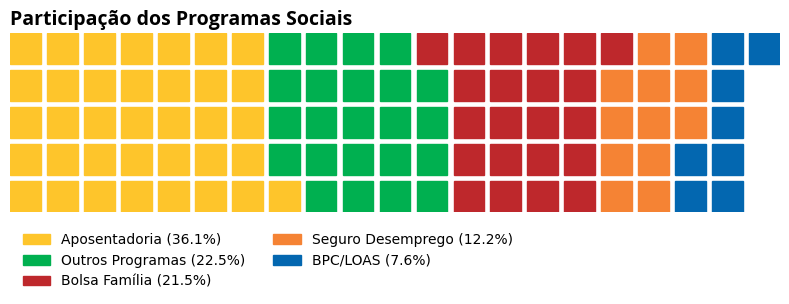

In [67]:
part_aposentadoria_TPS = dados.query("D421 == 'trabalho e programas sociais'").V408_sum.sum()
part_outros_TPS = dados.query("D421 == 'trabalho e programas sociais'").V406_sum.sum()
part_bolsa_familia_TPS = dados.query("D421 == 'trabalho e programas sociais'").V404_sum.sum()
part_seguro_desemprego_TPS = dados.query("D421 == 'trabalho e programas sociais'").V410_sum.sum()
part_bpc_loas_TPS = dados.query("D421 == 'trabalho e programas sociais'").V402_sum.sum()
renda_programas_sociais_TPS = dados.query("D421 == 'trabalho e programas sociais'").D415_sum.sum()

pct_aposentadoria_TPS = (100 * part_aposentadoria_TPS/renda_programas_sociais_TPS)
pct_outros_TPS = (100 * part_outros_TPS/renda_programas_sociais_TPS)
pct_bolsa_familia_TPS = (100 * part_bolsa_familia_TPS/renda_programas_sociais_TPS)
pct_seguro_desemprego_TPS = (100 * part_seguro_desemprego_TPS/renda_programas_sociais_TPS)
pct_bpc_loas_TPS = (100 * part_bpc_loas_TPS/renda_programas_sociais_TPS)

data = {'Aposentadoria': pct_aposentadoria_TPS, 'Outros Programas': pct_outros_TPS, 'Bolsa Família': pct_bolsa_familia_TPS,
        'Seguro Desemprego': pct_seguro_desemprego_TPS, 'BPC/LOAS': pct_bpc_loas_TPS}
fig = plt.figure(FigureClass=Waffle, rows=5, values=data, colors=["#fec52b", "#00b050", "#be282c", "#f58334", "#0367b0"],
                title={'label': 'Participação dos Programas Sociais', 'loc': 'left', 'size':14, 
                       'weight':'bold', 'family': 'Open Sans'},
                labels=[f"{k} ({v:.1f}%)" for k, v in data.items()],
                legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.5), 'ncol': 2, 'framealpha': 0},
                starting_location='NW', block_arranging_style='snake', figsize=(8,8))

##### Renda - Renda dos domicílios somente de programas sociais

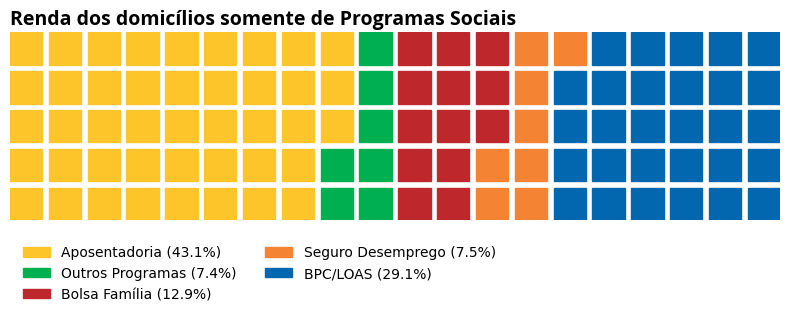

In [68]:
part_aposentadoria_PS = dados.query("D421 == 'programas sociais'").V408_sum.sum()
part_outros_PS = dados.query("D421 == 'programas sociais'").V406_sum.sum()
part_bolsa_familia_PS = dados.query("D421 == 'programas sociais'").V404_sum.sum()
part_seguro_desemprego_PS = dados.query("D421 == 'programas sociais'").V410_sum.sum()
part_bpc_loas_PS = dados.query("D421 == 'programas sociais'").V402_sum.sum()
renda_programas_sociais_PS = dados.query("D421 == 'programas sociais'").D415_sum.sum()

pct_aposentadoria_PS = (100 * part_aposentadoria_PS/renda_programas_sociais_PS)
pct_outros_PS = (100 * part_outros_PS/renda_programas_sociais_PS)
pct_bolsa_familia_PS = (100 * part_bolsa_familia_PS/renda_programas_sociais_PS)
pct_seguro_desemprego_PS = (100 * part_seguro_desemprego_PS/renda_programas_sociais_PS)
pct_bpc_loas_PS = (100 * part_bpc_loas_PS/renda_programas_sociais_PS)

data = {'Aposentadoria': pct_aposentadoria_PS, 'Outros Programas': pct_outros_PS, 'Bolsa Família': pct_bolsa_familia_PS,
        'Seguro Desemprego': pct_seguro_desemprego_PS, 'BPC/LOAS': pct_bpc_loas_PS}
fig = plt.figure(FigureClass=Waffle, rows=5, values=data, colors=["#fec52b", "#00b050", "#be282c", "#f58334", "#0367b0"],
                title={'label': 'Renda dos domicílios somente de Programas Sociais', 'loc': 'left', 'size':14, 
                       'weight':'bold', 'family': 'Open Sans'},
                labels=[f"{k} ({v:.1f}%)" for k, v in data.items()],
                legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.5), 'ncol': 2, 'framealpha': 0},
                starting_location='NW', block_arranging_style='snake', figsize=(8,8))

#### Dados de moradia

**Dicionário dos dados**

- ** :** aaaa

In [70]:
cols_moradia= ["V010", "V102_first", "V501_first", "V502_first", "V503_first", "V504_first", "V505_first", "V506_first", "V507_first", 
              "V508_first", "V509_first", "V510_first", "V511_first", "V512_first", "V513_first", "V514_first", "V515_first", 
              "V516_first", "V517_first", "V518_first", "V519_first"]
df_pm_moradia = dados[cols_moradia]
df_pm_moradia.head(3)

,V010,V102_first,V501_first,V502_first,V503_first,V504_first,V505_first,V506_first,V507_first,V508_first,...,V510_first,V511_first,V512_first,V513_first,V514_first,V515_first,V516_first,V517_first,V518_first,V519_first
0,2020A1000,Centro,Casa,"Cerâmica, lajota ou pedra",4,2,Canalizada em pelo menos um cômodo,1,0,Fossa não ligada à rede,...,Gás de botijão,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
1,2020A1001,Centro,Casa,"Cerâmica, lajota ou pedra",3,2,Canalizada em pelo menos um cômodo,1,0,"Rede geral, rede pluvial ou fossa ligada à rede",...,Gás de botijão,Próprio de algum morador - já pago,4,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não
2,2020A1002,Centro,Casa,"Cerâmica, lajota ou pedra",4,3,Canalizada em pelo menos um cômodo,1,0,"Rede geral, rede pluvial ou fossa ligada à rede",...,Gás de botijão,Próprio de algum morador - já pago,2,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim
